In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

### Parse raw data

In [ ]:

colspecs1 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs1)
columns1 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns1


colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
dfTUS2.columns =  columns2


colspecs3 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs3)
columns3 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Overall monthly expenses", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns3

colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
dfTUS4.columns =  columns4

colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
dfTUS5.columns =  columns5


### Rural and Urban sectors - subsample states based on codes

In [ ]:
#State codes 
# Kashmir = 1
# HimachalPradesh = 2
# Punjab = 3
# Chandigar = 4
# Uttarakhand = 5
# Haryana = 6
# Delhi = 7
# Rajasthan = 8
# UttarPradesh = 9
# Bihar = 10
# Sikkim = 11
# ArunachalPradesh = 12
# Nagaland = 13
# Manipur = 14
# Mizoram = 15
# Tripura = 16
# Meghalaya = 17
# Assam = 18
# WestBengal = 19
# Jharkhand = 20
# Odisha = 21
# Chhatishgarh = 22
# MadhyaPradesh = 23
# Gujarat = 24
# DamanDiu = 25
# DNHaveli = 26
# Maharashtra = 27
# AndhraPradesh = 28
# Karnataka = 29
# Goa = 30
# Lakshadweep = 31
# Kerala = 32
# Tamilnadu = 33
# Puducherry = 34
# ANIslands = 35
# Telangana = 36

#All india data - rural sector only

df_INR_HH1 = dfHH1[(dfHH1.Sector == 2)]
df_INR_TUS2 = dfTUS2[(dfTUS2.Sector == 2)]
df_INR_HH3 = dfHH3[(dfHH3.Sector == 2)]
df_INR_TUS4 = dfTUS4[(dfTUS4.Sector == 2)]
df_INR_TUS5 = dfTUS5[(dfTUS5.Sector == 2)] 

#Maharshstra state rural households

df_MHR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 27)]
df_MHR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
df_MHR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 27)]
df_MHR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
df_MHR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

#UttarPradesh state rural households
## NOTE: Uttar Pradesh data has a mistake Urban is Sector 2 and Rural is sector 1 based on information given on Sampling TUS document

df_UPR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 9)]
df_UPR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 9)]
df_UPR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 9)]
df_UPR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 9)]
df_UPR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 9)]

#Nagaland State rural households
# Urban rural sector code swap

df_NGR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 13)]
df_NGR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 13)]
df_NGR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 13)]
df_NGR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 13)]
df_NGR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 13)]

#Tamilnadu state rural households

df_TNR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 33)]
df_TNR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 33)]
df_TNR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 33)]
df_TNR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 33)]
df_TNR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 33)]

df_INR_HH1.to_csv('INR_HH1.csv')
df_INR_TUS2.to_csv('INR_TUS2.csv')
df_INR_HH3.to_csv('INR_HH3.csv')
df_INR_TUS4.to_csv('INR_TUS4.csv')
df_INR_TUS5.to_csv('INR_TUS5.csv')

df_MHR_HH1.to_csv('MHR_HH1.csv')
df_MHR_TUS2.to_csv('MHR_TUS2.csv')
df_MHR_HH3.to_csv('MHR_HH3.csv')
df_MHR_TUS4.to_csv('MHR_TUS4.csv')
df_MHR_TUS5.to_csv('MHR_TUS5.csv')

df_UPR_HH1.to_csv('UPR_HH1.csv')
df_UPR_TUS2.to_csv('UPR_TUS2.csv')
df_UPR_HH3.to_csv('UPR_HH3.csv')
df_UPR_TUS4.to_csv('UPR_TUS4.csv')
df_UPR_TUS5.to_csv('UPR_TUS5.csv')

df_NGR_HH1.to_csv('NGR_HH1.csv')
df_NGR_TUS2.to_csv('NGR_TUS2.csv')
df_NGR_HH3.to_csv('NGR_HH3.csv')
df_NGR_TUS4.to_csv('NGR_TUS4.csv')
df_NGR_TUS5.to_csv('NGR_TUS5.csv')

df_TNR_HH1.to_csv('TNR_HH1.csv')
df_TNR_TUS2.to_csv('TNR_TUS2.csv')
df_TNR_HH3.to_csv('TNR_HH3.csv')
df_TNR_TUS4.to_csv('TNR_TUS4.csv')
df_TNR_TUS5.to_csv('TNR_TUS5.csv')

In [2]:
df_INR_HH1 = pd.read_csv('INR_HH1.csv')
df_INR_TUS2 = pd.read_csv('INR_TUS2.csv')
df_INR_HH3 = pd.read_csv('INR_HH3.csv')
df_INR_TUS4 = pd.read_csv('INR_TUS4.csv')
df_INR_TUS5 = pd.read_csv('INR_TUS5.csv')


df_MHR_HH1 = pd.read_csv('MHR_HH1.csv')
df_MHR_TUS2 = pd.read_csv('MHR_TUS2.csv')
df_MHR_HH3 = pd.read_csv('MHR_HH3.csv')
df_MHR_TUS4 = pd.read_csv('MHR_TUS4.csv')
df_MHR_TUS5 = pd.read_csv('MHR_TUS5.csv')

df_UPR_HH1 = pd.read_csv('UPR_HH1.csv')
df_UPR_TUS2 = pd.read_csv('UPR_TUS2.csv')
df_UPR_HH3 = pd.read_csv('UPR_HH3.csv')
df_UPR_TUS4 = pd.read_csv('UPR_TUS4.csv')
df_UPR_TUS5 = pd.read_csv('UPR_TUS5.csv')

df_NGR_HH1 = pd.read_csv('NGR_HH1.csv')
df_NGR_TUS2 = pd.read_csv('NGR_TUS2.csv')
df_NGR_HH3 = pd.read_csv('NGR_HH3.csv')
df_NGR_TUS4 = pd.read_csv('NGR_TUS4.csv')
df_NGR_TUS5 = pd.read_csv('NGR_TUS5.csv')

df_TNR_HH1 = pd.read_csv('TNR_HH1.csv')
df_TNR_TUS2 = pd.read_csv('TNR_TUS2.csv')
df_TNR_HH3 = pd.read_csv('TNR_HH3.csv')
df_TNR_TUS4 = pd.read_csv('TNR_TUS4.csv')
df_TNR_TUS5 = pd.read_csv('TNR_TUS5.csv')

In [ ]:
#All india data - urban sector only

df_INU_HH1 = dfHH1[(dfHH1.Sector == 1)]
df_INU_TUS2 = dfTUS2[(dfTUS2.Sector == 1)]
df_INU_HH3 = dfHH3[(dfHH3.Sector == 1)]
df_INU_TUS4 = dfTUS4[(dfTUS4.Sector == 1)]
df_INU_TUS5 = dfTUS5[(dfTUS5.Sector == 1)] 

#Maharshstra state urban households

df_MHU_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 27)]
df_MHU_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 27)]
df_MHU_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 27)]
df_MHU_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 27)]
df_MHU_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 27)]

#UttarPradesh state urban households
## NOTE: Uttar Pradesh data has a mistake Urban is Sector 2 and Rural is sector 1 based on information given on Sampling TUS document

df_UPU_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 9)]
df_UPU_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 9)]
df_UPU_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 9)]
df_UPU_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 9)]
df_UPU_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 9)]

#Nagaland State urban households

df_NGU_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 13)]
df_NGU_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 13)]
df_NGU_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 13)]
df_NGU_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 13)]
df_NGU_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 13)]

#Tamilnadu state urban households

df_TNU_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 33)]
df_TNU_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 33)]
df_TNU_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 33)]
df_TNU_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 33)]
df_TNU_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 33)]

df_INU_HH1.to_csv('INU_HH1.csv')
df_INU_TUS2.to_csv('INU_TUS2.csv')
df_INU_HH3.to_csv('INU_HH3.csv')
df_INU_TUS4.to_csv('INU_TUS4.csv')
df_INU_TUS5.to_csv('INU_TUS5.csv')

df_MHU_HH1.to_csv('MHU_HH1.csv')
df_MHU_TUS2.to_csv('MHU_TUS2.csv')
df_MHU_HH3.to_csv('MHU_HH3.csv')
df_MHU_TUS4.to_csv('MHU_TUS4.csv')
df_MHU_TUS5.to_csv('MHU_TUS5.csv')

df_UPU_HH1.to_csv('UPU_HH1.csv')
df_UPU_TUS2.to_csv('UPU_TUS2.csv')
df_UPU_HH3.to_csv('UPU_HH3.csv')
df_UPU_TUS4.to_csv('UPU_TUS4.csv')
df_UPU_TUS5.to_csv('UPU_TUS5.csv')

df_NGU_HH1.to_csv('NGU_HH1.csv')
df_NGU_TUS2.to_csv('NGU_TUS2.csv')
df_NGU_HH3.to_csv('NGU_HH3.csv')
df_NGU_TUS4.to_csv('NGU_TUS4.csv')
df_NGU_TUS5.to_csv('NGU_TUS5.csv')

df_TNU_HH1.to_csv('TNU_HH1.csv')
df_TNU_TUS2.to_csv('TNU_TUS2.csv')
df_TNU_HH3.to_csv('TNU_HH3.csv')
df_TNU_TUS4.to_csv('TNU_TUS4.csv')
df_TNU_TUS5.to_csv('TNU_TUS5.csv')

### Confirm number of FSUs and households surveyed with NSS report in each state

In [ ]:
# confirming total number of FSUs sampled are from rural sector in each state - verify with Sampling TUS document

print(df_MHR_HH1['FSU'].nunique()) # Should be around 448
print(df_UPR_HH1['FSU'].nunique()) # Should be around 800
print(df_NGR_HH1['FSU'].nunique()) # Should be around 48
print(df_TNR_HH1['FSU'].nunique()) # Should be around 300

print(df_MHU_HH1['FSU'].nunique()) # Should be around 448
print(df_UPU_HH1['FSU'].nunique()) # Should be around 396
print(df_NGU_HH1['FSU'].nunique()) # Should be around 32 
print(df_TNU_HH1['FSU'].nunique()) # Should be around 300

In [ ]:
# Number of households surveyed in each state rural sector

print(df_MHR_HH1.shape[0])
print(df_UPR_HH1.shape[0])
print(df_NGR_HH1.shape[0])
print(df_TNR_HH1.shape[0])

print(df_MHR_HH3.shape[0])
print(df_UPR_HH3.shape[0])
print(df_NGR_HH3.shape[0])
print(df_TNR_HH3.shape[0])

# print(df_MHU_HH1.shape[0])
# print(df_UPU_HH1.shape[0])
# print(df_NGU_HH1.shape[0])
# print(df_TNU_HH1.shape[0])

# print(df_MHU_HH3.shape[0])
# print(df_UPU_HH3.shape[0])
# print(df_NGU_HH3.shape[0])
# print(df_TNU_HH3.shape[0])

#### Visulise number of households surveyed 

In [ ]:
df = pd.DataFrame({
    'Sector': ['Rural', 'Urban'],
    'Maharashtra': [df_MHR_HH1.shape[0], df_MHU_HH1.shape[0]],
    'Uttar Pradesh': [df_UPR_HH1.shape[0], df_UPU_HH1.shape[0]],
    'Nagaland':[df_NGR_HH1.shape[0], df_NGU_HH1.shape[0]],
     'Tamilnadu':[df_TNR_HH1.shape[0], df_TNU_HH1.shape[0]]})

plt.rc('font', size=18, family='Times New Roman')

sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(8, 6))
tidy = df.melt(id_vars='Sector').rename(columns=str.title)
tidy = tidy.rename(columns={'Variable':'State'})
sns.barplot(x='Sector', y='Value', hue='State', data=tidy, ax=ax1, palette='Spectral')


for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('Times New Roman')

ax1.set_xlabel('Sector')
ax1.set_ylabel('Number of Households')


leg = ax1.legend(loc='upper right', bbox_to_anchor=(0.98, 1.0))
for text in leg.get_texts():
    plt.setp(text, family='Times New Roman')

plt.savefig('Urban_rural_households.png', dpi=300)
plt.show()

#### Merge TUS level 2, 4 and 5 by 'id'

In [3]:
df_INR_TUS2['id'] = df_INR_TUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_INR_TUS2 = df_INR_TUS2.set_index('id')

df_INR_TUS4['id'] = df_INR_TUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_INR_TUS4 = df_INR_TUS4.set_index('id')

df_INR_TUS5['id'] = df_INR_TUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_INR_TUS5 = df_INR_TUS5.set_index('id')

#Maharashtra - merging data



df_MHR_TUS2['id'] = df_MHR_TUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_MHR_TUS2 = df_MHR_TUS2.set_index('id')

df_MHR_TUS4['id'] = df_MHR_TUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_MHR_TUS4 = df_MHR_TUS4.set_index('id')

df_MHR_TUS5['id'] = df_MHR_TUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_MHR_TUS5 = df_MHR_TUS5.set_index('id')

#Uttar Pradesh

df_UPR_TUS2['id'] = df_UPR_TUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_UPR_TUS2 = df_UPR_TUS2.set_index('id')

df_UPR_TUS4['id'] = df_UPR_TUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_UPR_TUS4 = df_UPR_TUS4.set_index('id')

df_UPR_TUS5['id'] = df_UPR_TUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_UPR_TUS5 = df_UPR_TUS5.set_index('id')

#Nagaland

df_NGR_TUS2['id'] = df_NGR_TUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_NGR_TUS2 = df_NGR_TUS2.set_index('id')

df_NGR_TUS4['id'] = df_NGR_TUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_NGR_TUS4 = df_NGR_TUS4.set_index('id')

df_NGR_TUS5['id'] = df_NGR_TUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_NGR_TUS5 = df_NGR_TUS5.set_index('id')

#Tamilnadu

df_TNR_TUS2['id'] = df_TNR_TUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_TNR_TUS2 = df_TNR_TUS2.set_index('id')

df_TNR_TUS4['id'] = df_TNR_TUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_TNR_TUS4 = df_TNR_TUS4.set_index('id')

df_TNR_TUS5['id'] = df_TNR_TUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
df_TNR_TUS5 = df_TNR_TUS5.set_index('id')


In [4]:
TUS_INR = pd.merge(df_INR_TUS2, df_INR_TUS4, on = 'id')
TUS_MHR = pd.merge(df_MHR_TUS2, df_MHR_TUS4, on = 'id')
TUS_UPR = pd.merge(df_UPR_TUS2, df_UPR_TUS4, on = 'id')
TUS_NGR = pd.merge(df_NGR_TUS2, df_NGR_TUS4, on = 'id')
TUS_TNR = pd.merge(df_TNR_TUS2, df_TNR_TUS4, on = 'id')


#### Assign date, month and day of the week to survey data

In [5]:
def func(x):
    try:
        return dt.datetime.strptime(x.split('.')[0], '%d%m%y')
    except:
        return pd.NaT
df_MHR_HH1['Survey Date'] = df_MHR_HH1['Date of Survey'].astype(str).apply(func)
df_MHR_HH1['Month']= df_MHR_HH1['Survey Date'].dt.month
df_MHR_HH1['Day']= df_MHR_HH1['Survey Date'].dt.day
df_MHR_HH1['Days of the week'] = df_MHR_HH1['Survey Date'].dt.dayofweek

df_UPR_HH1['Survey Date'] = df_UPR_HH1['Date of Survey'].astype(str).apply(func)
df_UPR_HH1['Month']= df_UPR_HH1['Survey Date'].dt.month
df_UPR_HH1['Day']= df_UPR_HH1['Survey Date'].dt.day
df_UPR_HH1['Days of the week'] = df_UPR_HH1['Survey Date'].dt.dayofweek

df_NGR_HH1['Survey Date'] = df_NGR_HH1['Date of Survey'].astype(str).apply(func)
df_NGR_HH1['Month']= df_NGR_HH1['Survey Date'].dt.month
df_NGR_HH1['Day']= df_NGR_HH1['Survey Date'].dt.day
df_NGR_HH1['Days of the week'] = df_NGR_HH1['Survey Date'].dt.dayofweek

df_TNR_HH1['Survey Date'] = df_TNR_HH1['Date of Survey'].astype(str).apply(func)
df_TNR_HH1['Month']= df_TNR_HH1['Survey Date'].dt.month
df_TNR_HH1['Day']= df_TNR_HH1['Survey Date'].dt.day
df_TNR_HH1['Days of the week'] = df_TNR_HH1['Survey Date'].dt.dayofweek





In [8]:
df_UPR_HH1['Days of the week'].nunique()
df_UPR_HH1['Month'].nunique()
df_UPR_HH1['Day'].nunique()

29

In [ ]:
df = pd.DataFrame({
    'Sector': ['Rural', 'Urban'],
    'Maharashtra': [df_MHR_HH1.shape[0], df_MHU_HH1.shape[0]],
    'Uttar Pradesh': [df_UPR_HH1.shape[0], df_UPU_HH1.shape[0]],
    'Nagaland':[df_NGR_HH1.shape[0], df_NGU_HH1.shape[0]],
     'Tamilnadu':[df_TNR_HH1.shape[0], df_TNU_HH1.shape[0]]})

plt.rc('font', size=18, family='Times New Roman')

sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(8, 6))
tidy = df.melt(id_vars='Sector').rename(columns=str.title)
tidy = tidy.rename(columns={'Variable':'State'})
sns.barplot(x='Sector', y='Value', hue='State', data=tidy, ax=ax1, palette='Spectral')


for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('Times New Roman')

ax1.set_xlabel('Sector')
ax1.set_ylabel('Number of Households')


leg = ax1.legend(loc='upper right', bbox_to_anchor=(0.98, 1.0))
for text in leg.get_texts():
    plt.setp(text, family='Times New Roman')

plt.savefig('Urban_rural_households.png', dpi=300)
plt.show()

In [ ]:
sns.set(font_scale = 1)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='Day', data=df_MHR_HH1, ax=ax1, palette='coolwarm')
ax1.set_xticklabels(range(1,30,1), rotation=90)
#ax1.set_xlabel('Sector')
for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('Times New Roman')
#for text in leg.get_texts():
 #   plt.setp(text, family='Times New Roman')
#ax1.set_title('Uttar Pradesh', fontsize=18)
ax1.set_ylabel('Number of Households')
ax1.set_xlabel('Day of the month')
plt.savefig('days of the month MH.png',dpi=300)

In [ ]:
sns.set(font_scale = 1)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='Days of the week', data=df_NGR_HH1, ax=ax1, palette='coolwarm')
ax1.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
#ax1.set_xlabel('Sector')
for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('Times New Roman')
#for text in leg.get_texts():
 #   plt.setp(text, family='Times New Roman')
#ax1.set_title('Uttar Pradesh', fontsize=18)
ax1.set_ylabel('Number of Households')
ax1.set_xlabel('Day of the week')
plt.savefig('days of the week NG.png',dpi=300)

In [ ]:
sns.set(font_scale = 1.3)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(12,4))
sns.countplot(x='Month', data=df_TNR_HH1, ax=ax1, palette='coolwarm')
#ax1.set_xlabel('Sector')
ax1.set_ylabel('Number of Households')
ax1.set_xticks(np.arange(0,12,1))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('Times New Roman')
# for text in leg.get_texts():
#     plt.setp(text, family='Times New Roman')
plt.tight_layout()
plt.savefig('Month of the year_TN.png')
plt.show()

<ipython-input-50-de50fd7edda6>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')


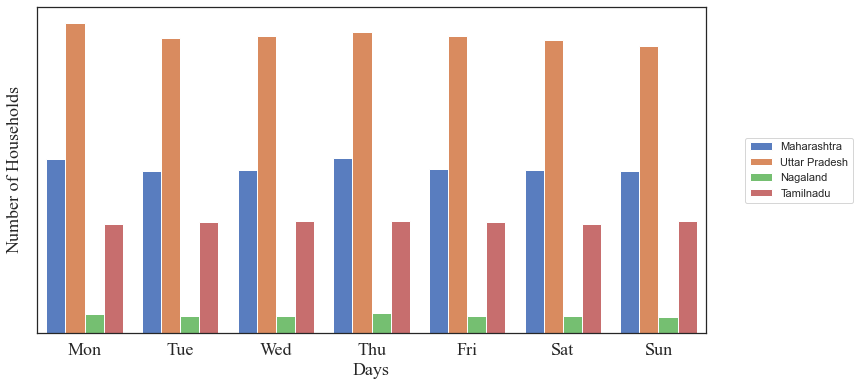

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Days': ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                  'Maharashtra': df_MHR_HH1['Days of the week'].value_counts(),
                  'Uttar Pradesh': df_UPR_HH1['Days of the week'].value_counts(),
                  'Nagaland': df_NGR_HH1['Days of the week'].value_counts(),
                  'Tamilnadu': df_TNR_HH1['Days of the week'].value_counts()})


# Reshape the DataFrame
df_melted = df.melt(id_vars='Days', var_name='States', value_name='Values')

# Set the plot style
sns.set(font_scale=1)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Days', y='Values', hue='States', data=df_melted, ax=ax1, palette='muted')

# Customize the plot
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=18, family='Times New Roman')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')
ax1.set_ylabel('Number of Households', fontsize=18, family='Times New Roman')
ax1.set_xlabel('Days', fontsize=18, family='Times New Roman')
ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), 
    frameon=True, mode="outside"
)

plt.savefig('Days of the week all.png',dpi=300)
plt.show()


<ipython-input-51-e7de097d91b4>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')


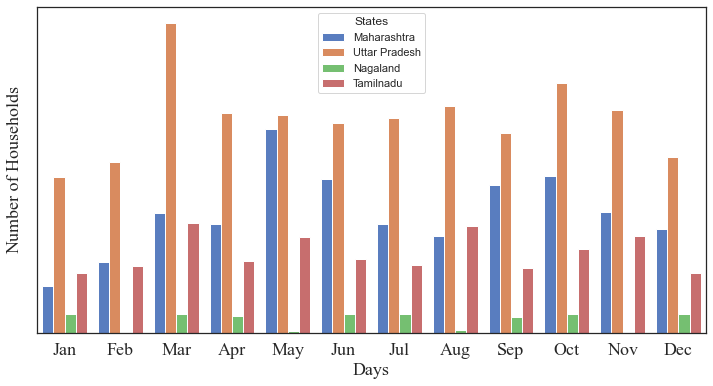

In [51]:
df = pd.DataFrame({'Months': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                  'Maharashtra': df_MHR_HH1['Month'].value_counts(),
                  'Uttar Pradesh': df_UPR_HH1['Month'].value_counts(),
                  'Nagaland': df_NGR_HH1['Month'].value_counts(),
                  'Tamilnadu': df_TNR_HH1['Month'].value_counts()})


# Reshape the DataFrame
df_melted = df.melt(id_vars='Months', var_name='States', value_name='Values')

# Set the plot style
sns.set(font_scale=1)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Months', y='Values', hue='States', data=df_melted, ax=ax1, palette='muted')

# Customize the plot
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=18, family='Times New Roman')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')
ax1.set_ylabel('Number of Households', fontsize=18, family='Times New Roman')
ax1.set_xlabel('Days', fontsize=18, family='Times New Roman')

plt.savefig('Month of the year all.png', dpi=300)
plt.show()


<ipython-input-53-c65df7e3259f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')


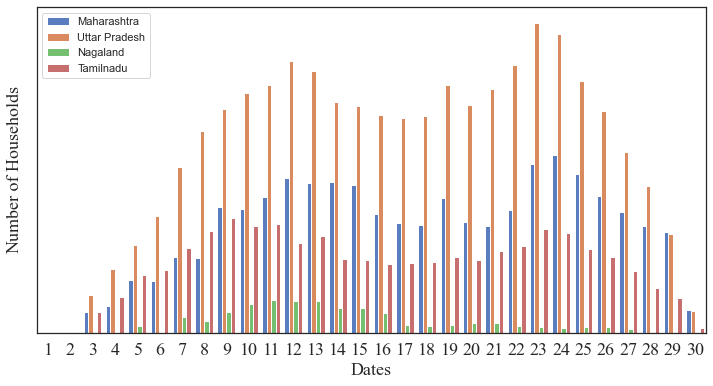

In [53]:
df = pd.DataFrame({'Day': np.arange(1,31,1),
                  'Maharashtra': df_MHR_HH1['Day'].value_counts(),
                  'Uttar Pradesh': df_UPR_HH1['Day'].value_counts(),
                  'Nagaland': df_NGR_HH1['Day'].value_counts(),
                  'Tamilnadu': df_TNR_HH1['Day'].value_counts()})


# Reshape the DataFrame
df_melted = df.melt(id_vars='Day', var_name='States', value_name='Values')

# Set the plot style
sns.set(font_scale=1)
plt.rc('font', size=18, family='Times New Roman')
sns.set_style("white")

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Day', y='Values', hue='States', data=df_melted, ax=ax1, palette='muted')

# Customize the plot
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=18, family='Times New Roman')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=18, family='Times New Roman')
ax1.set_ylabel('Number of Households', fontsize=18, family='Times New Roman')
ax1.set_xlabel('Dates', fontsize=18, family='Times New Roman')
ax1.legend(loc='upper left')

plt.savefig('Average number of samples in a the month all.png',dpi=300)
plt.show()


In [55]:
TUS_MH_rural = pd.merge(df_MHR_TUS5, TUS_MHR, left_index=True, right_index = True)
print(f"Number of total people surveyed in MH is {TUS_MH_rural.index.nunique()}")

TUS_UP_rural = pd.merge(df_UPR_TUS5, TUS_UPR, left_index=True, right_index = True)
print(f"Number of total people surveyed in UP is {TUS_UP_rural.index.nunique()}")

TUS_NG_rural = pd.merge(df_NGR_TUS5, TUS_NGR, left_index=True, right_index = True)
print(f"Number of total people surveyed in NG is {TUS_NG_rural.index.nunique()}")

TUS_TN_rural = pd.merge(df_TNR_TUS5, TUS_TNR, left_index=True, right_index = True)
print(f"Number of total people surveyed in TN is {TUS_TN_rural.index.nunique()}")

Number of total people surveyed in MH is 19497
Number of total people surveyed in UP is 39654
Number of total people surveyed in NG is 1900
Number of total people surveyed in TN is 10939


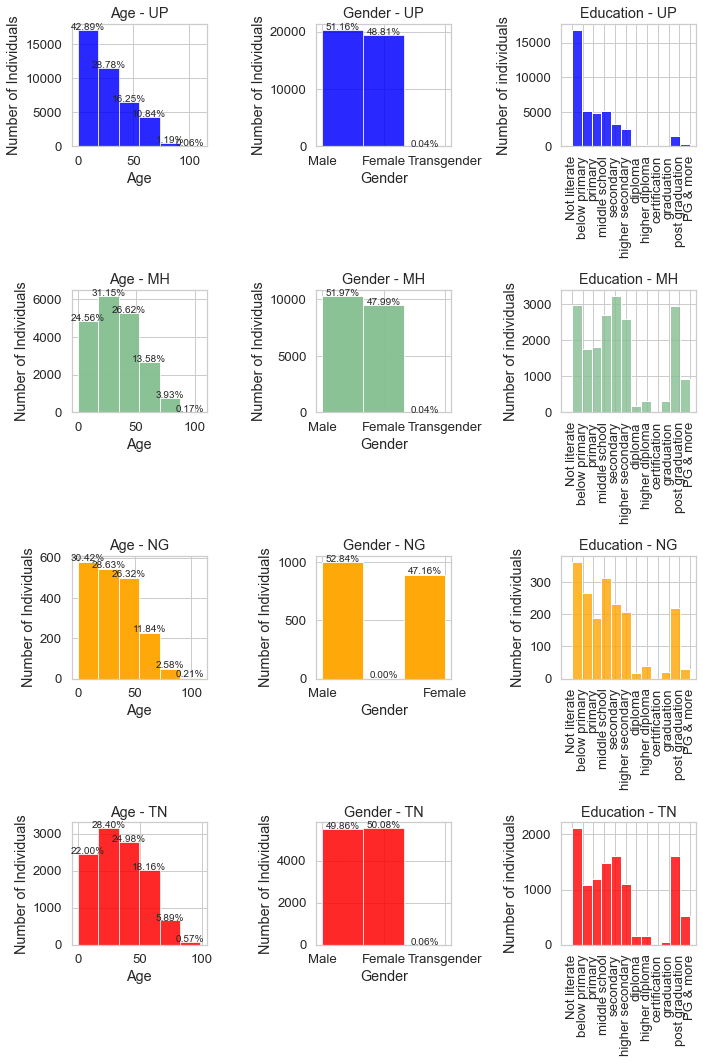

In [56]:
fig, axs = plt.subplots(4, 3, figsize=(10, 15))


sns.histplot(ax=axs[0,0], x='Age', data=TUS_UPR, bins=6, color='blue', alpha=0.6)
axs[0,0].set_title('Age - UP')
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Number of Individuals')
n, bins, patches = axs[0,0].hist(TUS_UPR['Age'], bins=6,color='blue',alpha=0.6)
percentages = [(count / sum(n)) * 100 for count in n]

for i in range(len(patches)):
    axs[0,0].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[0,1], x='Gender', data=TUS_UPR, bins=3,  color='blue',alpha=0.6)
axs[0,1].set_title('Gender - UP')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('Number of Individuals')
axs[0,1].set_xticks(np.arange(1,4,1))
axs[0,1].set_xticklabels(['Male', 'Female', 'Transgender'])
n, bins, patches = axs[0,1].hist(TUS_UPR['Gender'], bins=3,color='blue',alpha=0.6)
percentages = [(count / sum(n)) * 100 for count in n]


for i in range(len(patches)):
    axs[0,1].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[0,2], x='Education', data=TUS_UPR, bins=12,  color='blue',alpha=0.8)
axs[0,2].set_title('Education - UP')
axs[0,2].set_xticks(np.arange(0,13,1))
axs[0,2].set_xticklabels(['','Not literate','below primary', 'primary','middle school','secondary','higher secondary','diploma','higher diploma','certification','graduation','post graduation','PG & more'], rotation=90)
axs[0,2].set_ylabel('Number of individuals')
axs[0,2].set_xlabel('')

sns.histplot(ax=axs[1,0], x='Age', data=TUS_MHR, bins=6, color='#86bf91',alpha=0.8)
axs[1,0].set_title('Age - MH')
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('Number of Individuals')

n, bins, patches = axs[1,0].hist(TUS_MHR['Age'], bins=6,color='#86bf91',alpha=0.8)
percentages = [(count / sum(n)) * 100 for count in n]

for i in range(len(patches)):
    axs[1,0].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[1,1], x='Gender', data=TUS_MHR, bins=3,  color='#86bf91',alpha=0.8)
axs[1,1].set_title('Gender - MH')
axs[1,1].set_xlabel('Gender')
axs[1,1].set_ylabel('Number of Individuals')
axs[1,1].set_xticks(np.arange(1,4,1))
axs[1,1].set_xticklabels(['Male', 'Female', 'Transgender'])
n, bins, patches = axs[1,1].hist(TUS_MHR['Gender'], bins=3,color='#86bf91', alpha=0.8)
percentages = [(count / sum(n)) * 100 for count in n]


for i in range(len(patches)):
    axs[1,1].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[1,2], x='Education', data=TUS_MHR, bins=12,  color='#86bf91',alpha=0.8)
axs[1,2].set_title('Education - MH')
axs[1,2].set_xticks(np.arange(0,13,1))
axs[1,2].set_xticklabels(['','Not literate','below primary', 'primary','middle school','secondary','higher secondary','diploma','higher diploma','certification','graduation','post graduation','PG & more'], rotation=90)
axs[1,2].set_ylabel('Number of individuals')
axs[1,2].set_xlabel('')

sns.histplot(ax=axs[2,0], x='Age', data=TUS_NGR, bins=6, color='orange',alpha=0.8)
axs[2,0].set_title('Age - NG')
axs[2,0].set_xlabel('Age')
axs[2,0].set_ylabel('Number of Individuals')
n, bins, patches = axs[2,0].hist(TUS_NGR['Age'], bins=6,color='orange',alpha=0.8)
percentages = [(count / sum(n)) * 100 for count in n]

for i in range(len(patches)):
    axs[2,0].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[2,1], x='Gender', data=TUS_NGR, bins=3,  color='orange',alpha=0.8)
axs[2,1].set_title('Gender - NG')
axs[2,1].set_xlabel('Gender')
axs[2,1].set_ylabel('Number of Individuals')
axs[2,1].set_xticks(np.arange(1,4,1))
axs[2,1].set_xticklabels(['Male', 'Female', 'Transgender'])
n, bins, patches = axs[2,1].hist(TUS_NGR['Gender'], bins=3,color='orange',alpha=0.8)
percentages = [(count / sum(n)) * 100 for count in n]


for i in range(len(patches)):
    axs[2,1].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[2,2], x='Education', data=TUS_NGR, bins=12,  color='orange',alpha=0.8)
axs[2,2].set_title('Education - NG')
axs[2,2].set_xticks(np.arange(0,13,1))
axs[2,2].set_xticklabels(['','Not literate','below primary', 'primary','middle school','secondary','higher secondary','diploma','higher diploma','certification','graduation','post graduation','PG & more'], rotation=90)
axs[2,2].set_ylabel('Number of individuals')
axs[2,2].set_xlabel('')

sns.histplot(ax=axs[3,0], x='Age', data=TUS_TNR, bins=6, color='red',alpha=0.6)
axs[3,0].set_title('Age - TN')
axs[3,0].set_xlabel('Age')
axs[3,0].set_ylabel('Number of Individuals')
n, bins, patches = axs[3,0].hist(TUS_TNR['Age'], bins=6,color='red',alpha=0.6)
percentages = [(count / sum(n)) * 100 for count in n]

for i in range(len(patches)):
    axs[3,0].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[3,1], x='Gender', data=TUS_TNR, bins=3,  color='red', alpha=0.6)
axs[3,1].set_title('Gender - TN')
axs[3,1].set_xlabel('Gender')
axs[3,1].set_ylabel('Number of Individuals')
axs[3,1].set_xticks(np.arange(1,4,1))
axs[3,1].set_xticklabels(['Male', 'Female', 'Transgender'])
n, bins, patches = axs[3,1].hist(TUS_TNR['Gender'], bins=3,color='red',alpha=0.6)
percentages = [(count / sum(n)) * 100 for count in n]


for i in range(len(patches)):
    axs[3,1].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)


sns.histplot(ax=axs[3,2], x='Education', data=TUS_TNR, bins=12,  color='red',alpha=0.8)
axs[3,2].set_title('Education - TN')
axs[3,2].set_xticks(np.arange(0,13,1))
axs[3,2].set_xticklabels(['','Not literate','below primary', 'primary','middle school','secondary','higher secondary','diploma','higher diploma','certification','graduation','post graduation','PG & more'], rotation=90)
axs[3,2].set_ylabel('Number of individuals')
axs[3,2].set_xlabel('')



plt.tight_layout()
plt.savefig('Age_edu_gender_all.png',dpi=300)
plt.show()



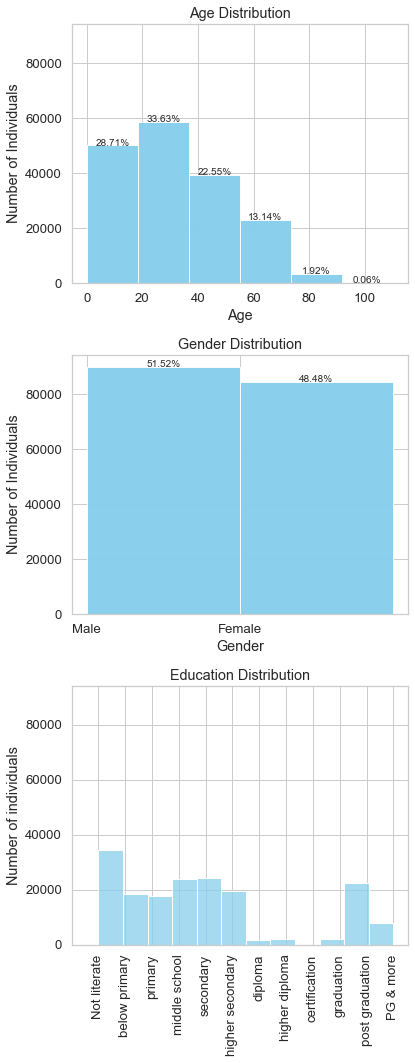

In [57]:
fig, axs = plt.subplots(3, 1, figsize=(6, 15), sharey=True)

# plot the histogram of age groups
sns.histplot(ax=axs[0], x='Age', data=TUS_INR, bins=6, color='skyblue')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of Individuals')

# get the bin counts and percentages
n, bins, patches = axs[0].hist(TUS_INR['Age'], bins=6, color='skyblue', alpha=0.9)
percentages = [(count / sum(n)) * 100 for count in n]

# loop through the patches and add the percentage value to the top of each bar
for i in range(len(patches)):
    axs[0].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)

# plot the histogram of education levels
sns.histplot(ax=axs[1], x='Gender', data=TUS_INR, bins=2, color='skyblue')
axs[1].set_title('Gender Distribution')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Individuals')
axs[1].set_xticks(np.arange(1,3,1))
axs[1].set_xticklabels(['Male', 'Female'])
# show the plot
n, bins, patches = axs[1].hist(TUS_INR['Gender'], bins=2, color='skyblue', alpha=0.9)
percentages = [(count / sum(n)) * 100 for count in n]

# loop through the patches and add the percentage value to the top of each bar
for i in range(len(patches)):
    axs[1].text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5,
                f'{percentages[i]:.2f}%', ha='center', fontsize=10)

# plot the histogram of gender

sns.histplot(ax=axs[2], x='Education', data=TUS_INR, bins=12,  color='skyblue')
axs[2].set_title('Education Distribution')
axs[2].set_xticks(np.arange(0,13,1))
axs[2].set_xticklabels(['','Not literate','below primary', 'primary','middle school','secondary','higher secondary','diploma','higher diploma','certification','graduation','post graduation','PG & more'], rotation=90)
axs[2].set_ylabel('Number of individuals')
axs[2].set_xlabel('')


plt.tight_layout()
plt.savefig('Age_edu_gender_all india.png',dpi=300)
plt.show()

